In [2]:
from files.utils.utility_functions import *
from files.pif.pif import *

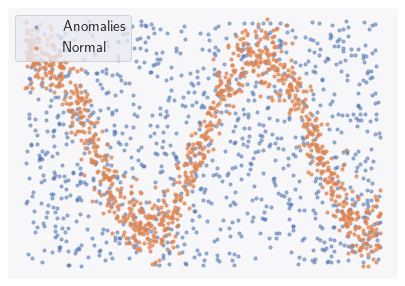

In [3]:
x = np.random.uniform(-2.5, 2.5, size=(1000))
y = np.sin(x)*np.cos(x)
y_n = y + np.random.normal(0, 0.1, size=(len(x)))

outliers_x = np.random.uniform(x.min(), x.max(), size=(len(x)))
outliers_y = np.random.uniform(y_n.min(), y_n.max(), size=(len(x)))
outliers = np.dstack((outliers_x, outliers_y))[0]

ds = np.dstack((x, y_n))[0]
ds = np.vstack((ds, outliers))

gt = np.zeros(shape=(len(ds)))
gt[np.arange(0, len(x))] = 1

fig = plt.figure(figsize=(7, 5))
ax = plt.gca()

# fig.patch.set_facecolor(ax.get_facecolor())
plt.scatter(outliers[:,0], outliers[:,1], label="Anomalies", s=10, alpha=0.5)
plt.scatter(x, y_n, label="Normal", s=10, alpha=0.7)
# plt.plot(x, y, color="sandybrown", linewidth=2, linestyle="--")
# plt.scatter(o1[0], o1[1], label="Outlier 1")
# plt.scatter(o2[0], o2[1], label="Outlier 2")
# plt.scatter(o3[0], o3[1], label="Outlier 3")
plt.xticks([])
plt.yticks([])
plt.legend(loc="upper left", prop={'size': 15})
fig.savefig("sinusoidal.svg", bbox_inches="tight")

In [34]:
params = {
    "root_path": "/home/catonz/Neural-PreferenceIsolation",

    "mss": 5,
    "num_models": 1000,
    "training_epochs": 200,

    "AE_structure": {
        "neurons": [2, 4, 1, 4, 2],
        "activation": torch.tanh
    },

    "SOM_structure": {
        "n_rows": 5,
        "n_cols": 5,
        "sigma": "default"
    }
}


pif = PreferenceIsolationForest(data=ds, model_name=AE)
scores = pif.anomaly_detection(in_th=0.1, params=params)

pif_auc, *_ = make_roc(gt, scores, show=False, to_plot=False);
print("PIF AUC: ", pif_auc)

Anomaly Detection
--------------------------------------------------
Building RanSac models
Iteration 1000/1000: [==============================] (100%) ETA: 0:02:43.932165
--------------------------------------------------
Building preference matrix
--------------------------------------------------
Building Voronoi Forest
--------------------------------------------------
Done
PIF AUC:  0.813872


In [37]:
x0_min, x0_max = ds[:, 0].min() - .1, ds[:, 0].max() + .1
x1_min, x1_max = ds[:, 1].min() - .1, ds[:, 1].max() + .1

h = .035
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                        np.arange(x1_min, x1_max, h))
data = np.c_[xx0.ravel(), xx1.ravel()]

preference_matrix = build_preference_matrix(
    data=data, models=pif.models, threshold=0.1, verbose=1)
pif.voronoi.fit(preference_matrix)
cool_scores = pif.voronoi.score_samples(preference_matrix)

--------------------------------------------------
Building preference matrix


KeyboardInterrupt: 

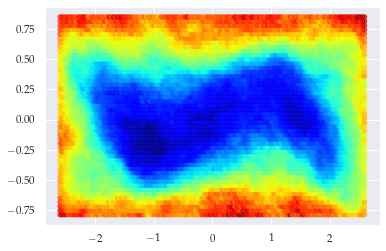

In [68]:
plot(data, c=cool_scores)

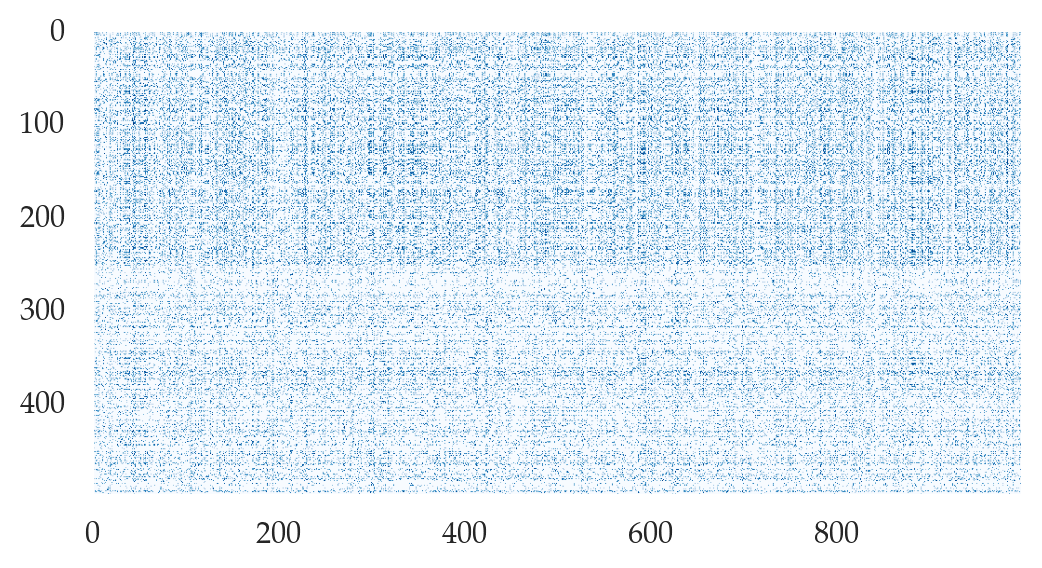

In [40]:
plt.figure(dpi=200)
plt.grid()
plt.imshow(pif.preference_matrix, cmap="Blues")

In [60]:
pref = np.array([[1, 1, 0, 1, 0],
                [1, 1, 0, 1, 1],
                [0, 0, 0, 0, 1],
                [0, 1, 1, 1, 1],
                [0, 1, 0, 1, 1]])
pref = pref[(-np.sum(pref, axis=1)).argsort()]
pref = pref[:, (-np.sum(pref, axis=0)).argsort()]
pref

array([[1, 1, 1, 1, 0],
       [1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0]])

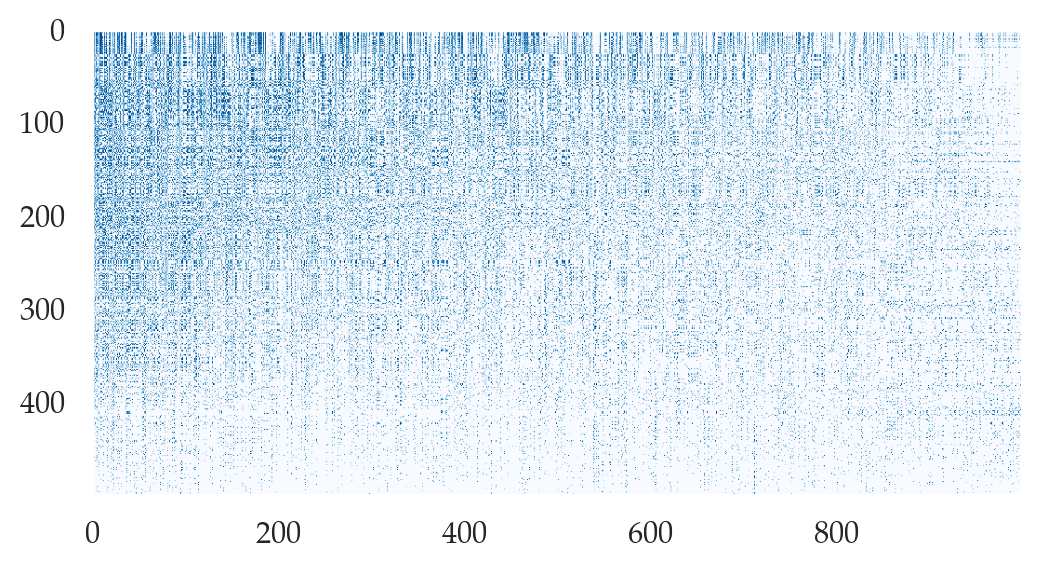

In [61]:
pref = pif.preference_matrix
pref = pref[(-np.sum(pref, axis=1)).argsort()]
pref = pref[:, (-np.sum(pref, axis=0)).argsort()]

plt.figure(dpi=200)
plt.grid()
plt.imshow(pref, cmap="Blues")

In [13]:
from sklearn.ensemble import IsolationForest as iFor

ifor = iFor().fit(ds)
scores_ifor = -ifor.score_samples(ds)
ifor_auc, *_ = make_roc(gt, scores_ifor, show=False, to_plot=False);
print("iFor AUC: ", ifor_auc)

iFor AUC:  0.720294


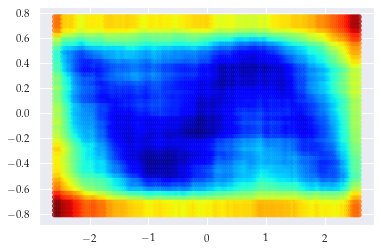

In [22]:
scores_ifor_2 = -ifor.score_samples(data)
plot(data, c=scores_ifor_2)

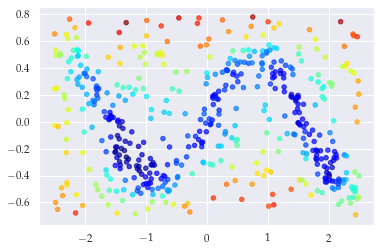

In [62]:
plot(ds, c=scores)

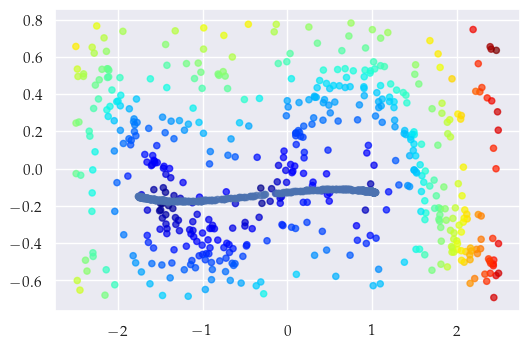

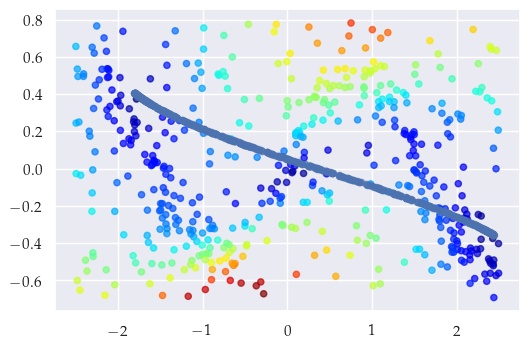

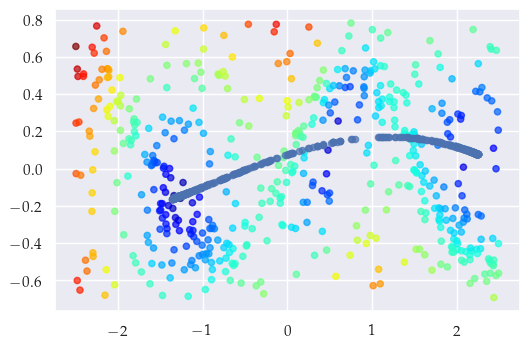

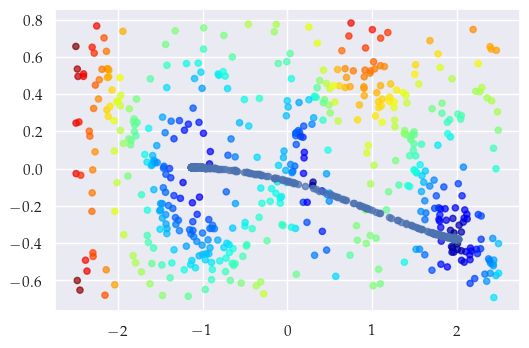

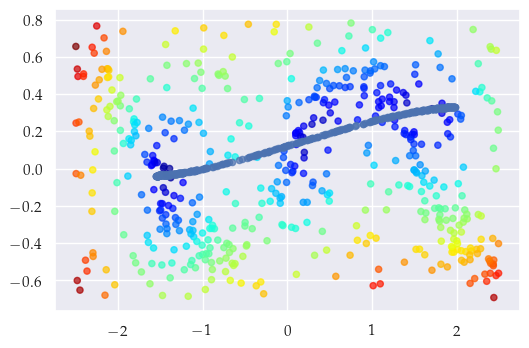

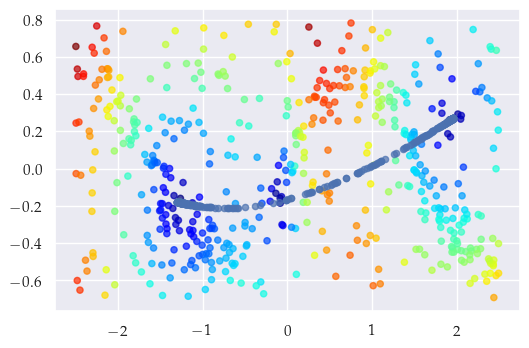

In [64]:
model = pif.models[0]
for i, model in enumerate(pif.models):
    if i > 5: break
    plot(ds, c=model.get_residuals(ds), new_fig=True, dpi=100)
    plot(model.predict(ds))

Epoch 500/500: [==============================] (100%) ETA: 0:00:20.944871 Mean Loss: 0.51999


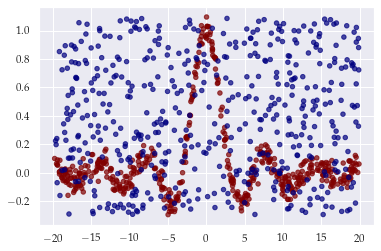

In [96]:
from files.classes.neural_models import *

x = np.random.uniform(-20, 20, size=(500))
# y = np.abs(np.sin(x)) - np.abs(np.cos(x))
y = np.sin(x) / x
y_n = y + np.random.normal(0, 0.05, size=(len(x)))

outliers_x = np.random.uniform(x.min(), x.max(), size=(len(x)))
outliers_y = np.random.uniform(y_n.min(), y_n.max(), size=(len(x)))
outliers = np.dstack((outliers_x, outliers_y))[0]

ds = np.dstack((x, y_n))[0]
ds = np.vstack((ds, outliers))

gt = np.zeros(shape=(len(ds)))
gt[np.arange(0, len(x))] = 1

plot(ds, c=gt)

nen = NeuralNetwork(neurons=[2, 8, 4, 1, 4, 8, 2], activation=torch.tanh)
nen.fit(epochs=500, data=ds, print_training=True, bs=32)
nen_scores = nen.get_residuals(ds)

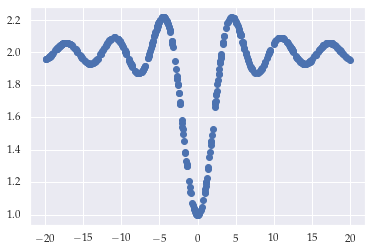

In [18]:
from files.utils.utility_functions import *

x = np.random.uniform(-20, 20, size=(500))
# y = np.abs(np.sin(x)) - np.abs(np.cos(x))
y = -1*np.sin(x) / x + 2

plt.scatter(x, y)

In [19]:
idxs = np.random.randint(0, len(x), 2)

x_1, x_2 = x[idxs]
y_1, y_2 = y[idxs]


b = (np.sin(x_1)*x_2*y_2 - np.sin(x_2)*x_1*y_1) / (np.sin(x_1)*x_2 - np.sin(x_2)*x_1)
a = (x_1 * (-b + y_1)) / np.sin(x_1)

a, b

(-1.0000000000000013, 2.0000000000000004)

In [97]:
nen_auc, *_ = make_roc(gt, nen_scores, show=False, to_plot=False);
print("NEN AUC: ", nen_auc)

NEN AUC:  0.587084


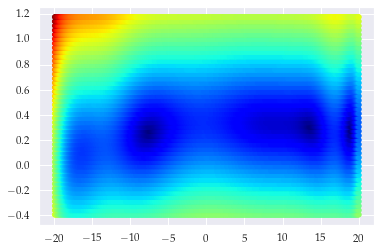

In [98]:
x0_min, x0_max = ds[:, 0].min() - .1, ds[:, 0].max() + .1
x1_min, x1_max = ds[:, 1].min() - .1, ds[:, 1].max() + .1

h = .035
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h),
                        np.arange(x1_min, x1_max, h))
data = np.c_[xx0.ravel(), xx1.ravel()]

plot(data, c=nen.get_residuals(data))

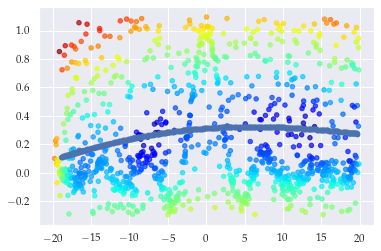

In [100]:
plot(ds, c=nen.get_residuals(ds))
plot(nen.predict(ds))

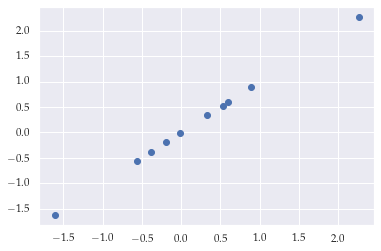

In [ ]:
x = np.random.normal(0, 1, size=(10))
y = x
plt.scatter(x, y)

In [ ]:
print(x)

[-0.56720696 -0.19176267  0.5284967   0.59255254 -0.38224772 -1.61209072
  0.88797838  0.33339835  2.26531028 -0.01610616]


In [ ]:
m1 = 2
m2 = -0.3

x = np.linspace(-0.5, 1.5, num=10)
y = m1*x
y2 = m2*np.linspace(-1.5, 0.5, num=10)
line = np.array([[-2, 2], [-2, 2]])

plt.figure(figsize=(100, 2))
plt.gca().set_aspect("equal")
plt.plot(x, y)
plt.scatter(x, y + np.random.normal(0, 0.1, len(x)), s=100)
plt.plot(x, y2)
plt.scatter(x, y2 + np.random.normal(0, 0.1, len(x)), s=100)

NameError: name 'm' is not defined

In [ ]:
-0.7*line[0], -0.7*line[1]

(array([ 1.4, -1.4]), array([ 1.4, -1.4]))